
# From Pandas to Model-Ready: Titanic Data Preparation (Step-by-Step)
**Class focus:** A simple, beginner-friendly path to turn the Titanic dataset into a model-ready table **without** using scikit-learn Pipelines yet.  
We'll **discuss Pipelines next session**.

**Topics covered today**
1. What “model-ready” means  
2. Pick target **y** and features **X** without leakage  
3. Split early (train/test with `stratify`)  
4. Numeric prep: invalids, missing values, outliers  
5. Categorical prep: clean labels, One-Hot vs Ordinal, rare categories  
6. Datetime to features (tiny synthetic example)  
7. Scaling: Standard vs Min-Max vs Robust  
8. Save processed data + tiny sanity check



## 1) Setup and Load Titanic (Google Drive link → `uc?id=` format)
This mirrors the loading style from your lab file: paste a **public** Google Drive file link to a CSV, we extract the `id`, and then use `https://drive.google.com/uc?id=...` to read with Pandas.

> If you don't have a Drive link yet, run the **fallback** cell below to load Seaborn's Titanic instead.


In [ ]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
file_link = 'https://drive.google.com/file/d/1wADS0ybifgQJcPEtzqDurKAi_CEmwKDF/view?usp=sharing'
#get the id part of the file

id =file_link.split("/")[-2]
# creating a new link using the id so that we can easily read the csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
df = pd.read_csv(new_link)

df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1



## 2) Basic EDA (Exploratory Data Analysis)
This introduce simple EDA steps:
- `info()`, `describe(include='all')`
- Missing values overview
- Distribution plots and crosstabs for key columns


***Titanic Dataset:***

*   **PassengerId**

*   **Pclass:**	Ticket class. A proxy for socio-economic status (SES).
                 1 = 1st (Upper)
                 2 = 2nd (Middle)
                 3 = 3rd (Lower)

*   **Name**

*   **Sex**

*   **Age:**	Age in years. Age is fractional if less than 1. If the age is estimated, is it in the form of **xx.5**	.

*   **SibSp:**	number of siblings / spouses aboard the Titanic. The dataset defines family relations in this way:

                 Sibling = brother, sister, stepbrother, stepsister
                 Spouse = husband, wife (mistresses and fiancés were ignored)


*   **Parch:**	number of parents / children aboard the Titanic. The dataset defines family relations in this way:
                 Parent = mother, father
                 Child = daughter, son, stepdaughter, stepson
                 [Some children travelled only with a nanny, therefore parch=0 for them.]

*   **Ticket:**	Ticket number

*   **Fare:**	Passenger fare

*   **Cabin:**	Cabin number

*   **Embarked:**	Port of Embarkation
                 C = Cherbourg
                 Q = Queenstown
                 S = Southampton

*   **Survived:**	Survival Status
                 0 = No
                 1 = Yes


In [ ]:
# check dataframe shape(Number of rows ad columns)

df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,891.000000
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,NaN
top,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S,NaN
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,NaN
mean,446.000000,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,0.383838
std,257.353842,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,0.486592
min,1.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,223.500000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,0.000000
50%,446.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,668.500000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,1.000000


In [ ]:
# Check Unique Values
df.nunique()

,0
PassengerId,891
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248
Cabin,147


In [ ]:
#Missing Values per column
df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


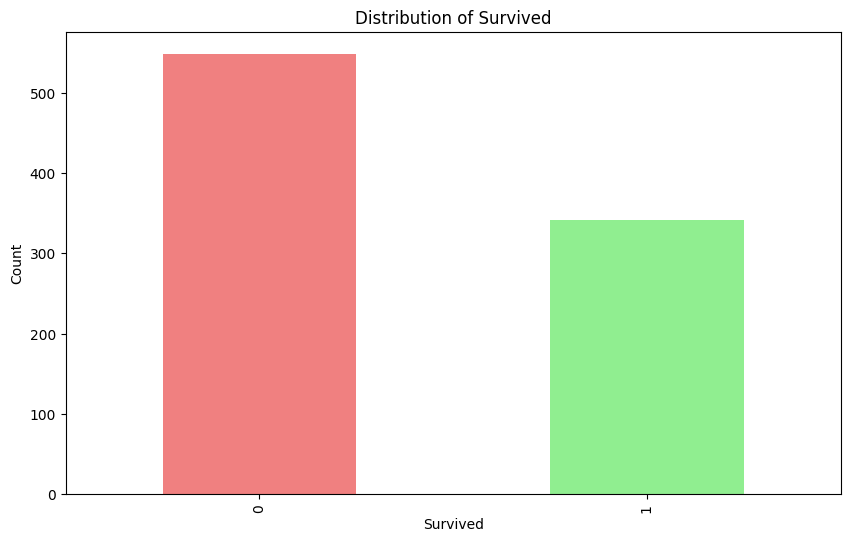

In [ ]:
# Simple distributions and relationships (match common Titanic columns)
# Target distribution if 'survived' present (seaborn titanic uses 'survived'; some CSVs use 'Survived')
target_col = "Survived"
plt.figure(figsize=(10, 6))
df[target_col].value_counts().sort_index().plot(kind='bar',color=['lightcoral','lightgreen'])
plt.title(f"Distribution of {target_col}")
plt.xlabel(target_col)
plt.ylabel("Count")
plt.show()

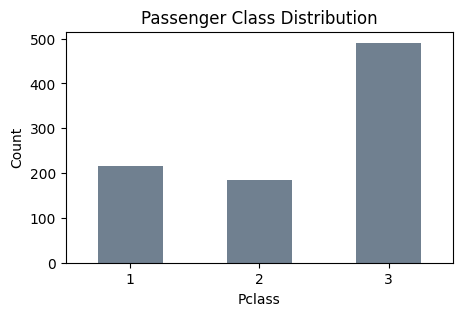

In [ ]:

# Pclass distribution
pclass_col = "pclass" if "pclass" in df.columns else ("Pclass" if "Pclass" in df.columns else None)
if pclass_col:
    plt.figure(figsize=(5,3))
    df[pclass_col].value_counts().sort_index().plot(kind='bar', color='slategrey')
    plt.title("Passenger Class Distribution")
    plt.xlabel(pclass_col)
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.show()

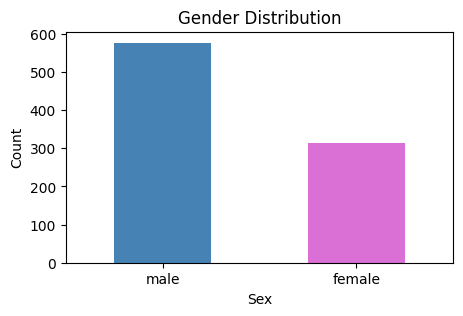

In [ ]:

# Sex distribution
sex_col = "sex" if "sex" in df.columns else ("Sex" if "Sex" in df.columns else None)
if sex_col:
    plt.figure(figsize=(5,3))
    df[sex_col].value_counts().plot(kind='bar', color=['steelblue','orchid'])
    plt.title("Gender Distribution")
    plt.xlabel(sex_col)
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.show()

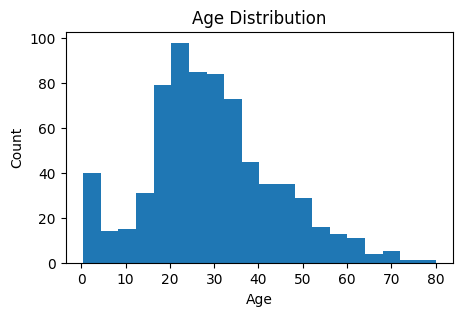

In [ ]:
age_col = "age" if "age" in df.columns else ("Age" if "Age" in df.columns else None)
if age_col and df[age_col].notna().any():
    plt.figure(figsize=(5,3))
    df[age_col].dropna().plot(kind='hist', bins=20)
    plt.title("Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()

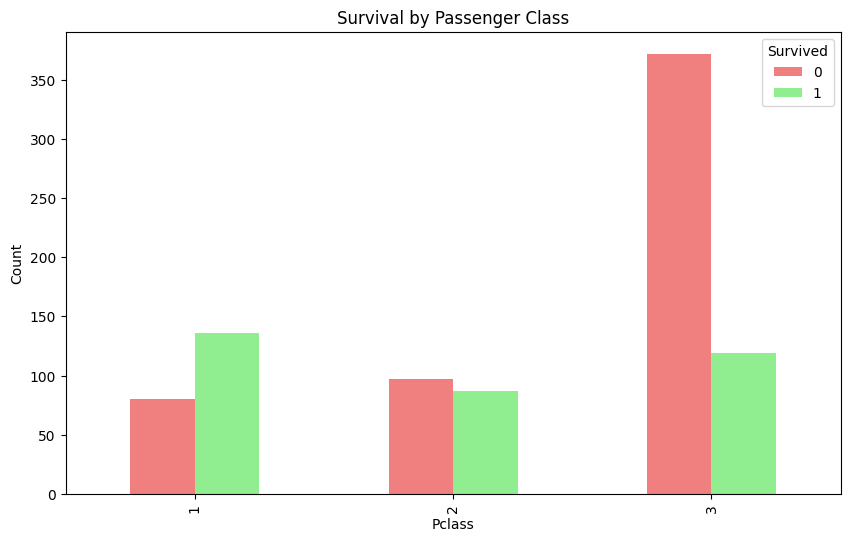

In [ ]:
# Survival by Pclass crosstab
if target_col and pclass_col:
    pd.crosstab(df[pclass_col], df[target_col]).plot(kind='bar',figsize=(10,6),color=['lightcoral','lightgreen'])
    plt.title("Survival by Passenger Class")
    plt.xlabel(pclass_col)
    plt.ylabel("Count")
    plt.show()

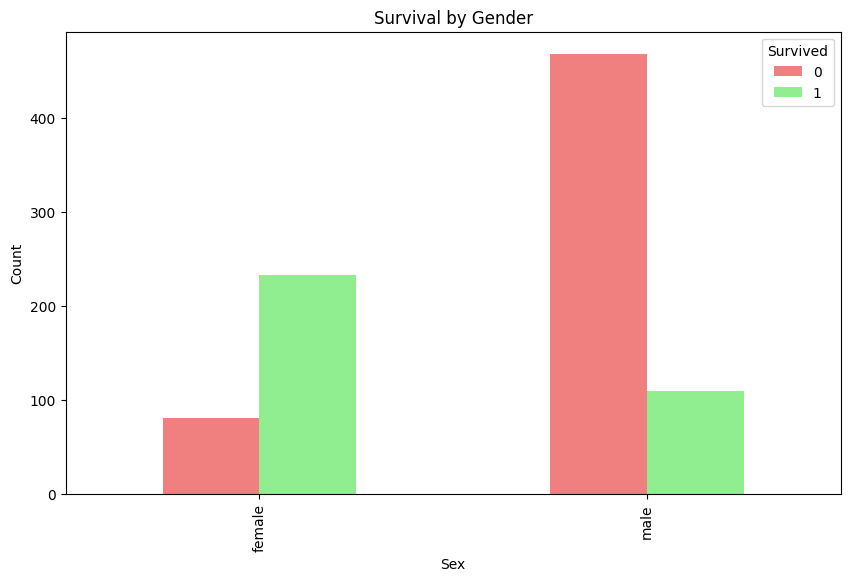

In [ ]:
# survival by sex crosstab
if target_col and sex_col:
  pd.crosstab(df[sex_col], df[target_col]).plot(kind='bar',figsize=(10,6),color=['lightcoral','lightgreen'])
  plt.title("Survival by Gender")
  plt.xlabel(sex_col)
  plt.ylabel("Count")
  plt.show()

             PassengerId    Pclass       Age     SibSp     Parch      Fare  \
PassengerId     1.000000 -0.035144  0.036847 -0.057527 -0.001652  0.012658   
Pclass         -0.035144  1.000000 -0.369226  0.083081  0.018443 -0.549500   
Age             0.036847 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
SibSp          -0.057527  0.083081 -0.308247  1.000000  0.414838  0.159651   
Parch          -0.001652  0.018443 -0.189119  0.414838  1.000000  0.216225   
Fare            0.012658 -0.549500  0.096067  0.159651  0.216225  1.000000   
Survived       -0.005007 -0.338481 -0.077221 -0.035322  0.081629  0.257307   

             Survived  
PassengerId -0.005007  
Pclass      -0.338481  
Age         -0.077221  
SibSp       -0.035322  
Parch        0.081629  
Fare         0.257307  
Survived     1.000000  


<Figure size 1000x600 with 0 Axes>

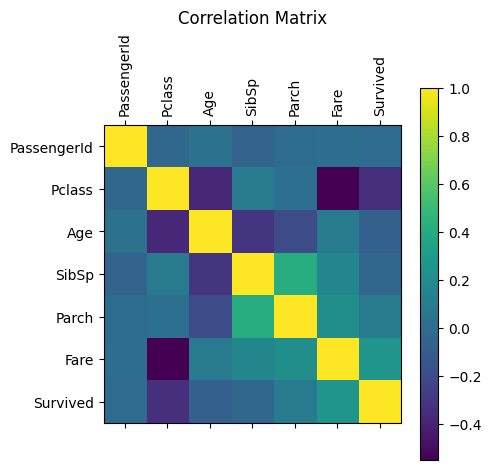

In [ ]:
# Correlation matrix plot
plt.figure(figsize=(10,6))
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)
plt.matshow(correlation_matrix)
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns,rotation = 90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

In [ ]:

# Drop unnecessary columns from the original DataFrame
# Based on EDA, 'PassengerId', 'Name', and 'Ticket' are typically not useful features.
# 'Cabin' has a high number of missing values.
colsToDrop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df = df.drop(columns=colsToDrop, errors = 'ignore')
print("Current column list in df: ", df.columns.tolist())

Current column list in df:  ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']


In [ ]:
target = df.columns[-1]
y = df[target].astype(int)
X = df.iloc[:,:-1].copy()
print("X :",list(X.columns))
print("Y:",target)
X.head(7)

X : ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Y: Survived


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,NaN,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25,random_state = 42, stratify = y)
X_train.shape, X_test.shape

((668, 7), (223, 7))